In [4]:
# vgg feature

import numpy as np
import torch
import cv2
from vggNet import *

def vgg(img_folder):
    # specify gpu id
    gpu_id = 0

    model = vgg16(pretrained=True)
    model.eval()
    model.cuda(gpu_id)

    img_path = img_folder
    image = cv2.imread(img_path)
    h, w, ch = image.shape

    # 对图像内容计算
    input1 = image.transpose((2, 0, 1))
    input1 = np.float32(input1) / 255.0
    input1 = np.reshape(input1, [1, ch, h, w])
    input1 = torch.from_numpy(input1)
    input1 = input1.cuda(gpu_id)

    conv_1, conv_2 = model(input1)
    conv_1 = conv_1.data.cpu().numpy()
    conv_2 = conv_2.data.cpu().numpy()
#     print(conv_1.shape, conv_2.shape)
    
    feat1 = np.zeros((h, w))
    feat2 = np.zeros((h, w))
    
    for i in range(h):
        for j in range(w):
            feat1[i, j] = np.mean(conv_1[0, :, i, j])
            feat2[i, j] = np.mean(conv_2[0, :, i, j])
            
    return feat1, feat2


In [5]:
import skimage
from skimage.segmentation import felzenszwalb, mark_boundaries, slic
from os.path import basename, join, isfile
import os
import matplotlib.pyplot as plt    

import torchvision.models as models

% matplotlib inline

basename = os.getcwd()
img_dir = join(basename, 'input')
img_list = [join(img_dir, f) for f in os.listdir(img_dir) if isfile(join(img_dir, f))]

# # vis part
# for img_path in img_list:
    
#     if img_path[-3:] == 'jpg':
        
#         #  get conv feature
#         img = cv2.imread(img_path)
#         conv_1, conv_2 = vgg(img_path)
#         conv_1_2 = (conv_1 + conv_2) / 2
        
#         gray_img = skimage.io.imread(img_path, as_gray=True)
#         comb = (gray_img + conv_1_2) / 2
        
#         # vis feature
#         fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

#         ax[0, 0].imshow(img)
#         ax[0, 0].set_title('ori-img')

#         ax[0, 1].imshow(conv_1)
#         ax[0, 1].set_title('conv_1 feat')
        
#         ax[1, 0].imshow(conv_2)
#         ax[1, 0].set_title('conv_2 feat')

#         ax[1, 1].imshow(conv_1_2)
#         ax[1, 1].set_title('conv (1+2) feat')

        
        
        # generate superpixels
        
#         # sp method: felzenszwalb
#         # 1. use rgb
#         segments_rgb = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
#         # 2. use vgg16 conv_1, conv_2, conv_1_2
#         segments_conv_1 = felzenszwalb(conv_1, scale=100, sigma=0.5, min_size=50)
#         segments_conv_2 = felzenszwalb(conv_2, scale=100, sigma=0.5, min_size=50)
#         segments_conv_1_2 = felzenszwalb(conv_1_2, scale=100, sigma=0.5, min_size=50)
#         # 3. combined?
#         segments_comb = felzenszwalb(comb, scale=100, sigma=0.5, min_size=50)
        
                
#         # sp method: SLIC
#         # 1. use img
#         segments_rgb = slic(img, n_segments=250, compactness=10, sigma=1)
#         # 2. use feat_1, feat_2, feat_1_2
#         segments_conv_1 = slic(conv_1, n_segments=50, compactness=10, sigma=1)
#         segments_conv_2 = slic(conv_2, n_segments=25, compactness=10, sigma=1)
#         segments_conv_1_2 = slic(conv_1_2, n_segments=9, compactness=10, sigma=1)
#         # 3. combined?
#         segments_comb = slic(comb, n_segments=250, compactness=10, sigma=1)

        
#         # show superpixels results
#         fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)

#         # superpixel vis
#         ax[0, 0].imshow(img)
#         ax[0, 0].set_title('ori-img')
   
#         ax[0, 1].imshow(mark_boundaries(img, segments_conv_1))
#         ax[0, 1].set_title('conv_1_feat')
        
#         ax[1, 0].imshow(mark_boundaries(img, segments_conv_2))
#         ax[1, 0].set_title('conv_2_feat')
        
#         ax[1, 1].imshow(mark_boundaries(img, segments_conv_1_2))
#         ax[1, 1].set_title('conv_1_2_feat')
        
#         ax[2, 0].imshow(mark_boundaries(img, segments_rgb))
#         ax[2, 0].set_title('rgb_feat')
        
#         ax[2, 1].imshow(mark_boundaries(img, segments_comb))
#         ax[2, 1].set_title('comb_feat')


#         # weight of rgb and conv feat 
#         weight = [0.01, 0.1, 1, 10, 100]
#         fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)

#         for i, w in enumerate(weight):
#             comb = (w * gray_img + conv_1_2) / (w + 1)
#             segments_comb = felzenszwalb(comb, scale=100, sigma=0.5, min_size=50)

#             ax[int(i-i%2)/2, int(i%2)].imshow(mark_boundaries(img, segments_comb))
# #             ax[int(i-i%2)/2, int(i%2)].set_title('Subplot n°{}' .format(i+1))

#         fig.delaxes(ax[2, 1])
#         plt.show()
        


In [13]:

from os.path import join, isfile
import os
import cv2

# ASA, BR evaluate

# by different sp numbers(given different paras here)
para_list = [0.1, 1, 10, 50, 100, 200]

# gtseg_dir = '../SEAL/data/groundtruth'
# label_dir = '../SEAL/data/output/500'

basename = os.getcwd()
img_dir = join(basename, 'input')
img_list = [join(img_dir, f) for f in os.listdir(img_dir) if isfile(join(img_dir, f))]

# prepare output folders
imlog_dir = './output'
if not os.path.exists(imlog_dir):
    os.makedirs(imlog_dir)

label_dir = []
for met in ['rgb', 'conv', 'comb']:
    imlog_dir = join('./output', met)
    if not os.path.exists(imlog_dir):
        os.makedirs(imlog_dir)
        
    for para in para_list:
        tmp_dir = os.path.join(imlog_dir, str(para))
        if not os.path.exists(tmp_dir):
            os.makedirs(tmp_dir)

        
# save sp results
for img_path in img_list:
    if img_path[-3:] == 'jpg':
        img_name = img_path.split('/')[-1].split('.')[0]
        print(img_name)
        #  get rgb, conv, comb feature
        img = cv2.imread(img_path)
        conv_1, conv_2 = vgg(img_path)
        conv_1_2 = (conv_1 + conv_2) / 2
        
        gray_img = skimage.io.imread(img_path, as_gray=True)
        comb = (gray_img + conv_1_2) / 2
        
        for para in para_list:
            
            # save segmnets labels as uint16 png files
            segments_rgb = felzenszwalb(img, scale=para, sigma=0.5, min_size=50)
#             print(segments_rgb.shape)

            output_fullpath = os.path.join('./output', 'rgb', str(para), img_name + '.png')
            cv2.imwrite(output_fullpath, np.uint16(segments_rgb))

            segments_comb = felzenszwalb(comb, scale=para, sigma=0.5, min_size=50)

            output_fullpath = os.path.join('./output', 'comb', str(para), img_name + '.png')
            cv2.imwrite(output_fullpath, np.uint16(segments_comb))

            segments_conv_1_2 = felzenszwalb(conv_1_2, scale=para, sigma=0.5, min_size=50)

            output_fullpath = os.path.join('./output', 'conv', str(para), img_name + '.png')
            cv2.imwrite(output_fullpath, np.uint16(segments_conv_1_2))
            
            


157036
15004
135037
159029
245051
155060
42044
112082
61060
311068
25098
138078
105019
80099
274007
314016
12074
188063
147021
254054
65074
309004
134052
181091
145053
172032
227040
268002
254033
159091
100080
113016
55067
105053
285036
163062
159045
293029
189003
23025
108041
161062
253036
109034
43083
181079
59078
216041
183055
242078
147062
60079
323016
24063
249061
113044
189011
66039
103041
134008
76002
117054
374067
16052
8143
90076
365073
140075
198054
35010
24004
97017
15088
310007
231015
166081
68077
144067
301007
187071
317080
35008
12003
20008
92059
239007
311081
153077
145014
207056
151087
225017
260081
365025
271031
271008
140055
209070
156079
61086
27059
23084
178054
368016
8049
277095
196015
66075
100098
385028
126039
368078
216053
372047
2092
187029
108073
187003
135069
78019
374020
299091
22013
164074
326038
106025
176035
176019
33066
188005
35091
181018
183087
43070
376020
376001
388016
173036
55075
216066
353013
370036
202012
236017
41004
87065
41025
246016
286092
46

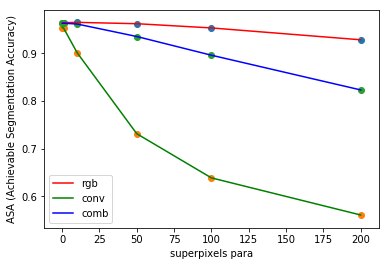

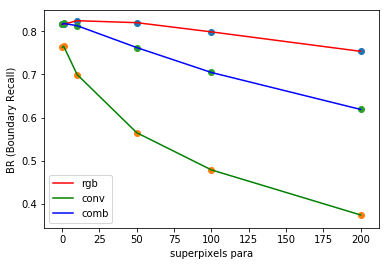

In [14]:
import sys
sys.path.insert(0, '../SEAL/eval')
from eval import evaluate
import os
import matplotlib.pyplot as plt    

% matplotlib inline

para_list = [0.1, 1, 10, 50, 100, 200]

# compute asa, br
# by rgb, conv, comb
asa_rgb, br_rgb = [], []
asa_conv, br_conv = [], []
asa_comb, br_comb = [], []

# if not os.path.exists(label_dir):
#     print('%s does not exist' % label_dir)
    
#             output_fullpath = os.path.join('./output', 'comb', str(para), img_name + '.png')

gtseg_dir = './groundtruth'

for para in para_list:
    
    label_dir = os.path.join('./output', 'rgb', str(para))
    asa, br = evaluate(gtseg_dir, label_dir)
    asa_rgb.append(asa) 
    br_rgb.append(br)
    
    label_dir = os.path.join('./output', 'conv', str(para))
    asa, br = evaluate(gtseg_dir, label_dir)
    asa_conv.append(asa) 
    br_conv.append(br)
    
    label_dir = os.path.join('./output', 'comb', str(para))
    asa, br = evaluate(gtseg_dir, label_dir)
    asa_comb.append(asa) 
    br_comb.append(br)
    
    
# plot asa & br curves

plt.figure('ASA')
# asa: rgb, conv, comb
plt.plot(para_list, asa_rgb, c='r', label='rgb')
plt.scatter(para_list, asa_rgb)
plt.plot(para_list, asa_conv, c='g', label='conv')
plt.scatter(para_list, asa_conv)
plt.plot(para_list, asa_comb, c='b', label='comb')
plt.scatter(para_list, asa_comb)

plt.xlabel('superpixels para')
plt.ylabel('ASA (Achievable Segmentation Accuracy)')
plt.legend()

plt.figure('BR')

# br: rgb, conv, comb
plt.plot(para_list, br_rgb, c='r', label='rgb')
plt.scatter(para_list, br_rgb)
plt.plot(para_list, br_conv, c='g', label='conv')
plt.scatter(para_list, br_conv)
plt.plot(para_list, br_comb, c='b', label='comb')
plt.scatter(para_list, br_comb)

plt.xlabel('superpixels para')
plt.ylabel('BR (Boundary Recall)')
plt.legend()
plt.show()


In [15]:
print(asa_rgb, br_rgb)
print(asa_conv, br_conv)
print(asa_comb, br_comb)

([0.9645238091875936, 0.9645331458002884, 0.9652525893057581, 0.9624339749695477, 0.9535702763054044, 0.928659085396741], [0.8163151117941538, 0.8163590721653559, 0.8244682237065087, 0.8199487738567252, 0.7986051849742728, 0.7535729899969756])
([0.9542867704660852, 0.9530948002175497, 0.9016970333291515, 0.7314305423910007, 0.6387083080546186, 0.560794441947233], [0.7626024306818963, 0.765638685279021, 0.6999066771118956, 0.5650475972305399, 0.4790149386636614, 0.37465400006526495])
([0.9632831836874516, 0.9634653578630389, 0.9618080107982006, 0.9355568997815074, 0.8962803381893912, 0.8233838855200907], [0.8157643869561357, 0.8182865775139397, 0.8129461332420366, 0.7622773757349014, 0.7045942167109082, 0.619005403677396])
